In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('people_analytics_data.csv', index_col=None)

In [ ]:
df.isnull().any()

In [ ]:
df.head()

In [ ]:
df['Área'].replace(['Tribo Digital CLF','Tribo Digital (PE+CE)','Tribo Digital BH2','Tribo Digital SP2',
                    'Tribo Digital ISP1','Tribo Digital BH1','Tribo Digital SP3','Tribo Digital PR1',
                    'Tribo Digital Cursinho','Tribo Presencial RJ1+ISP1','Tribo Digital SP1'],
                   [0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df['Status'].replace(['Inativo','Ativo'],[0,1],inplace=True)
df['Formação'].replace(['1 Formação','2 Formação','3 Formação','4 Formação','5 Formação'],[0,1,2,3,4],inplace=True)
df['Sexo'].replace(['Male','Female'],[0,1],inplace=True)

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
ativos = df.Status.value_counts()/150
ativos

1    0.82
0    0.18
Name: Status, dtype: float64

In [ ]:
# Taxa de demissão é igual a 18%

In [ ]:
colabs_ativos = df.groupby('Status')
colabs_ativos.mean()

,Área,Universitário,Graduado,Formação,Português,Matemática,Inglês,Programação,Sexo,Idade,Total Horas,Horas CLF,Horas Formação,Horas Geração de Demanda,Horas Semana Gratuita,Horas Outras Funções,Horas Semana Regular
Status,,,,,,,,,,,,,,,,,
0,5.000000,0.259259,0.111111,2.296296,0.703704,0.814815,0.259259,0.074074,0.592593,22.888889,127.925926,19.296296,5.296296,46.851852,23.148148,12.666667,20.888889
1,4.471545,0.341463,0.121951,2.211382,0.821138,0.699187,0.333333,0.162602,0.601626,22.317073,161.471545,12.813008,8.365854,32.910569,26.772358,10.699187,69.829268


In [ ]:
df.describe()

,Área,Status,Universitário,Graduado,Formação,Português,Matemática,Inglês,Programação,Sexo,Idade,Total Horas,Horas CLF,Horas Formação,Horas Geração de Demanda,Horas Semana Gratuita,Horas Outras Funções,Horas Semana Regular
count,150.000000,150.000000,150.000000,150.00000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,4.566667,0.820000,0.326667,0.12000,2.226667,0.80000,0.720000,0.320000,0.146667,0.600000,22.420000,155.433333,13.98000,7.813333,35.420000,26.120000,11.053333,61.020000
std,2.954729,0.385475,0.470565,0.32605,1.546360,0.40134,0.450503,0.468039,0.354958,0.491539,2.924715,47.398555,20.84892,4.769009,36.670356,29.073829,27.550999,60.005533
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.00000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,21.000000,135.000000,0.00000,4.250000,4.250000,0.000000,0.000000,6.000000
50%,4.000000,1.000000,0.000000,0.00000,2.000000,1.00000,1.000000,0.000000,0.000000,1.000000,22.000000,151.500000,8.00000,9.000000,26.000000,17.000000,1.000000,54.000000
75%,7.000000,1.000000,1.000000,0.00000,4.000000,1.00000,1.000000,1.000000,0.000000,1.000000,24.000000,175.750000,19.00000,11.000000,52.000000,41.500000,6.000000,95.250000
max,10.000000,1.000000,1.000000,1.00000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,28.000000,349.000000,145.00000,15.000000,168.000000,142.000000,158.000000,324.000000


,Área,Status,Universitário,Graduado,Formação,Português,Matemática,Inglês,Programação,Sexo,Idade,Total Horas,Horas CLF,Horas Formação,Horas Geração de Demanda,Horas Semana Gratuita,Horas Outras Funções,Horas Semana Regular
Área,1.000000,-0.068942,-0.201607,-0.217353,-0.254507,0.130170,0.089747,-0.025236,-0.124569,0.009242,-0.075876,0.022962,0.111201,-0.369662,0.021017,-0.002438,0.257099,-0.118697
Status,-0.068942,1.000000,0.067339,0.012816,-0.021167,0.112792,-0.098937,0.061007,0.096138,0.007084,-0.075365,0.272814,-0.119869,0.248109,-0.146549,0.048051,-0.027528,0.314392
Universitário,-0.201607,0.067339,1.000000,-0.257209,0.238820,-0.113719,-0.198818,-0.051194,-0.087862,-0.011606,-0.168630,0.039047,-0.101258,0.161934,-0.039897,-0.133864,-0.087804,0.180408
Graduado,-0.217353,0.012816,-0.257209,1.000000,0.251849,0.030773,-0.089555,0.010555,-0.153093,0.008375,0.193121,0.015721,0.104021,-0.102035,0.031120,-0.022769,0.106121,-0.073876
Formação,-0.254507,-0.021167,0.238820,0.251849,1.000000,-0.012977,-0.023892,-0.110163,-0.097654,0.031787,-0.083517,-0.040265,-0.017553,0.084042,-0.030687,-0.125407,-0.015094,0.052028
Português,0.130170,0.112792,-0.113719,0.030773,-0.012977,1.000000,-0.274685,0.092895,0.018844,0.272166,-0.093769,0.053979,-0.058231,0.057507,0.006202,-0.077879,-0.047586,0.115542
Matemática,0.089747,-0.098937,-0.198818,-0.089555,-0.023892,-0.274685,1.000000,-0.145144,0.174595,-0.236403,-0.017115,-0.069398,-0.037757,-0.096339,0.114012,0.069708,-0.156141,-0.066328
Inglês,-0.025236,0.061007,-0.051194,0.010555,-0.110163,0.092895,-0.145144,1.000000,-0.001616,0.035007,-0.069424,0.147695,0.026796,-0.018161,0.070715,0.190990,0.035100,-0.042288
Programação,-0.124569,0.096138,-0.087862,-0.153093,-0.097654,0.018844,0.174595,-0.001616,1.000000,-0.084625,-0.247213,0.109487,-0.063990,0.174869,0.007610,0.074372,-0.102374,0.098172
Sexo,0.009242,0.007084,-0.011606,0.008375,0.031787,0.272166,-0.236403,0.035007,-0.084625,1.000000,0.014939,0.024774,0.012967,0.068140,-0.008489,-0.175077,0.014967,0.091518


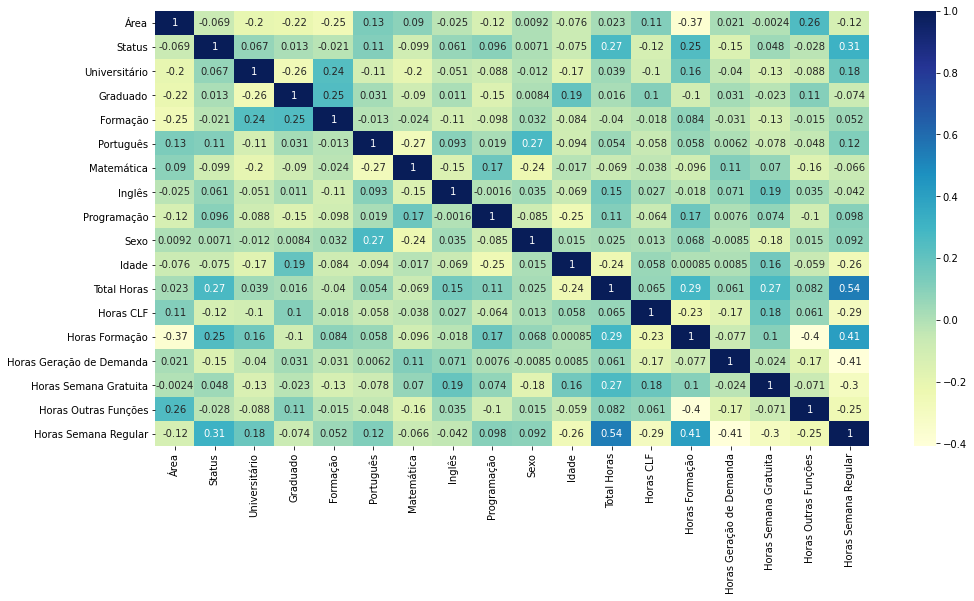

In [ ]:
plt.figure(figsize=(16,8))

correlacao = df.corr()
correlacao = (correlacao)
sns.heatmap(correlacao,xticklabels=correlacao.columns.values,yticklabels=correlacao.columns.values,annot=True,
            cmap="YlGnBu",linewidths=0)

correlacao

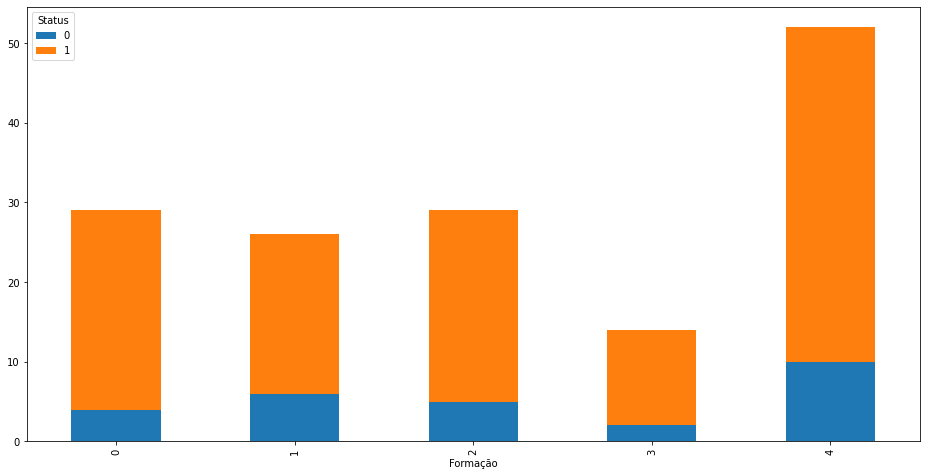

In [ ]:
tb_area_ativos = pd.crosstab(index=df['Formação'],columns=df['Status'])
tb_area_ativos.plot(kind='bar',figsize=(16,8),stacked=True)

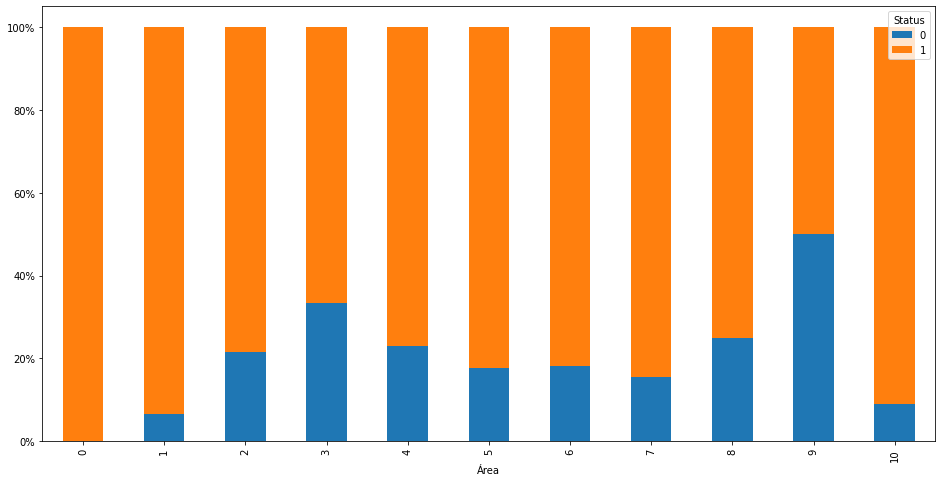

In [ ]:
df.groupby(['Área','Status']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',figsize=(16,8),stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

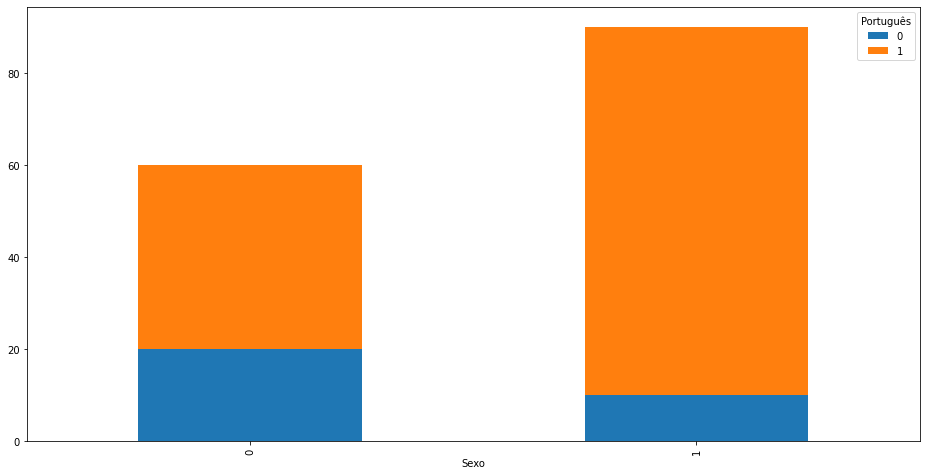

In [ ]:
tb_area_ativos = pd.crosstab(index=df['Sexo'],columns=df['Português'])
tb_area_ativos.plot(kind='bar',figsize=(16,8),stacked=True)

Text(0.5, 1.0, 'Total de Horas Trabalhadas nos Últimos dois Meses')

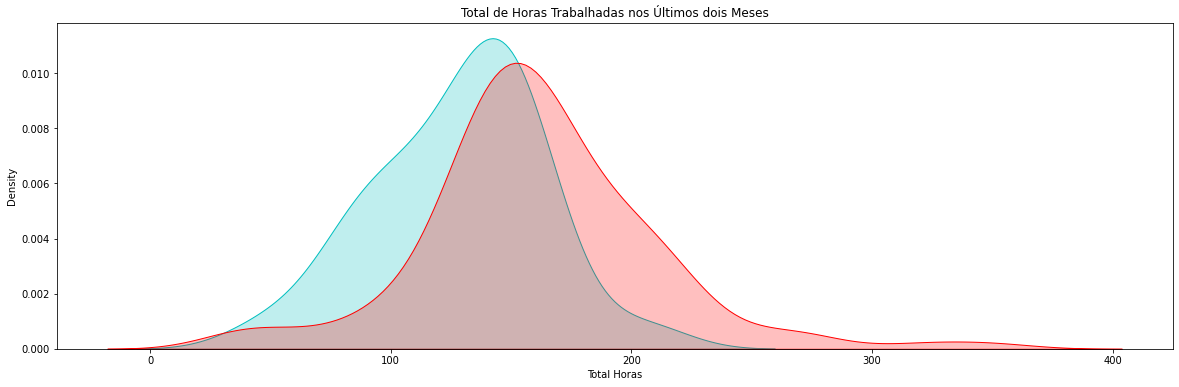

In [ ]:
fig = plt.figure(figsize=(20,6))
ax=sns.kdeplot(df.loc[(df['Status']==0),'Total Horas'],color='c',shade=True,label='Saiu da companhia')
ax=sns.kdeplot(df.loc[(df['Status']==1),'Total Horas'],color='r',shade=True,label='Não saiu da companhia')
plt.title('Total de Horas Trabalhadas nos Últimos dois Meses')

Text(0.5, 1.0, 'Total de Horas Trabalhadas nos Últimos dois Meses')

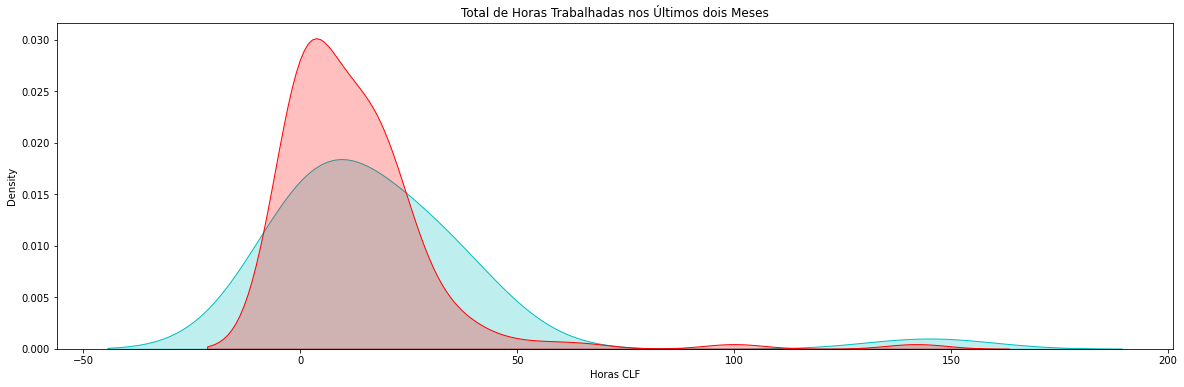

In [ ]:
fig = plt.figure(figsize=(20,6))
ax=sns.kdeplot(df.loc[(df['Status']==0),'Horas CLF'],color='c',shade=True,label='Saiu da companhia')
ax=sns.kdeplot(df.loc[(df['Status']==1),'Horas CLF'],color='r',shade=True,label='Não saiu da companhia')
plt.title('Total de Horas Trabalhadas nos Últimos dois Meses')

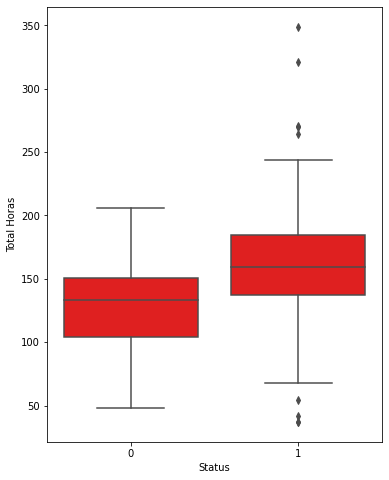

In [ ]:
fig = plt.figure(figsize=(6,8))

sns.boxplot(x='Status',y='Total Horas',data=df,color='r')

In [ ]:
fig = plt.figure(figsize=(6,8))

sns.boxplot(x='Status',y='Horas CLF',data=df,color='r')

In [ ]:
fig = plt.figure(figsize=(6,8))

sns.boxplot(x='Status',y='Horas Semana Regular',data=df,color='r')

In [ ]:
fig = plt.figure(figsize=(6,8))

sns.boxplot(x='Status',y='Horas Geração de Demanda',data=df,color='r')

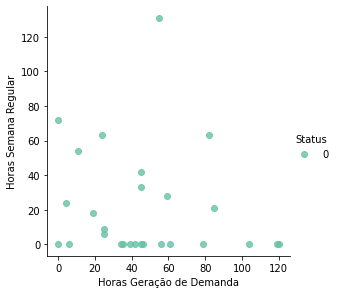

In [ ]:
sns.lmplot(x='Horas Geração de Demanda',y='Horas Semana Regular',data=df[df.Status==0],fit_reg=False,hue='Status',palette='Set2',height=4)

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df['int'] = 1
var = ['Horas Geração de Demanda','Horas Semana Regular','int','Status']
df = df[var]

alvo = 'Status'
x = df.drop('Status',axis=1)
y = df[alvo]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=27,stratify=y)
x_train.head()

iv = ['Horas Geração de Demanda','Horas Semana Regular','int']
logReg = sm.Logit(y_train,x_train[iv])
regressao = logReg.fit()
regressao.summary
regressao.params

In [ ]:
coeficiente = regressao.params

def probabilidade_permanencia (coeficiente, horas_geracao_demanda,horas_semana_regular):
    return coeficiente[0]*horas_geracao_demanda+coeficiente[1]*horas_semana_regular+coeficiente[2]

In [ ]:
import numpy as np

colaborador_1 = probabilidade_permanencia(coeficiente,5,65)
colaborador_2 = probabilidade_permanencia(coeficiente,70,0)

prob_1 = np.exp(colaborador_1) / (1+np.exp(colaborador_1))
prob_2 = np.exp(colaborador_2) / (1+np.exp(colaborador_2))

In [ ]:
prob_1

In [ ]:
prob_2